## Objectives


Objective of this report is to analyze the forest cover data set provided by the UCI.
Using this data set the goal is to select appropriate and relevant features, apply classifiers and evaluate the performance.


In [2]:
# get required imports

import csv
import numpy as np
import pprint
import matplotlib
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import pandas as pd
%matplotlib inline

In [3]:
# reads a csv file ignoring the first header row
# convert all fields to int
# returns a pandas dataframe
def readCSV(fname):
    hdr=[]
    with open(fname, newline='') as csvfile:
        csvdata = csv.reader(csvfile, delimiter=',')
        i=0
        data=[]
        for row in csvdata:
            if i>0:
                data.append([int(col) for col in row])
            elif i==0:
                hdr=row
                #print([x for x in enumerate(hdr)])
            i = i+1       
    return hdr, pd.DataFrame(data)

In [4]:
hdr, df = readCSV('covtype.data')
print([x for x in enumerate(hdr)])
print ("test")
#df

[(0, '2596'), (1, '51'), (2, '3'), (3, '258'), (4, '0'), (5, '510'), (6, '221'), (7, '232'), (8, '148'), (9, '6279'), (10, '1'), (11, '0'), (12, '0'), (13, '0'), (14, '0'), (15, '0'), (16, '0'), (17, '0'), (18, '0'), (19, '0'), (20, '0'), (21, '0'), (22, '0'), (23, '0'), (24, '0'), (25, '0'), (26, '0'), (27, '0'), (28, '0'), (29, '0'), (30, '0'), (31, '0'), (32, '0'), (33, '0'), (34, '0'), (35, '0'), (36, '0'), (37, '0'), (38, '0'), (39, '0'), (40, '0'), (41, '0'), (42, '1'), (43, '0'), (44, '0'), (45, '0'), (46, '0'), (47, '0'), (48, '0'), (49, '0'), (50, '0'), (51, '0'), (52, '0'), (53, '0'), (54, '5')]
test


In [287]:
# rename column names to original column names
df.columns = ["Elevation", "Aspect", "Slope", "Horizontal_Distance_To_Hydrology", "Vertical_Distance_To_Hydrology", 
              "Horizontal_Distance_To_Roadways", "Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm", "Horizontal_Distance_To_Fire_Points",
              "Wilderness_Area1", "Wilderness_Area2", "Wilderness_Area3", "Wilderness_Area4", "Soil_Type1", "Soil_Type2", 
              "Soil_Type3", "Soil_Type4", "Soil_Type5", "Soil_Type6", "Soil_Type7", "Soil_Type8", "Soil_Type9", 
              "Soil_Type10", "Soil_Type11", "Soil_Type12", "Soil_Type13", "Soil_Type14", "Soil_Type15", 
              "Soil_Type16", "Soil_Type17", "Soil_Type18", "Soil_Type19", "Soil_Type20", "Soil_Type21", 
              "Soil_Type22", "Soil_Type23", "Soil_Type24", "Soil_Type25", "Soil_Type26", "Soil_Type27", 
              "Soil_Type28", "Soil_Type29", "Soil_Type30", "Soil_Type31", "Soil_Type32", "Soil_Type33", 
              "Soil_Type34", "Soil_Type35", "Soil_Type36", "Soil_Type37", "Soil_Type38", "Soil_Type39", 
              "Soil_Type40", "Cover_Type"]

In [150]:
df.loc[0:1:,'Cover_Type']

0    5
1    2
Name: Cover_Type, dtype: int64

In [156]:
#Copying the actual data frame content to a new temp data frame so that we perform our preprocessing on this data set copy
temp = df
print(type(temp))
temp

<class 'pandas.core.frame.DataFrame'>


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
1,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
2,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
3,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
4,2579,132,6,300,-15,67,230,237,140,6031,...,0,0,0,0,0,0,0,0,0,2
5,2606,45,7,270,5,633,222,225,138,6256,...,0,0,0,0,0,0,0,0,0,5
6,2605,49,4,234,7,573,222,230,144,6228,...,0,0,0,0,0,0,0,0,0,5
7,2617,45,9,240,56,666,223,221,133,6244,...,0,0,0,0,0,0,0,0,0,5
8,2612,59,10,247,11,636,228,219,124,6230,...,0,0,0,0,0,0,0,0,0,5
9,2612,201,4,180,51,735,218,243,161,6222,...,0,0,0,0,0,0,0,0,0,5


In [138]:
list_new = df.groupby('Soil_Type1').size().tolist()
pd.DataFrame(list_new)
#list_list = [[1,2], [3,4]]
#pd.DataFrame(list_new, columns = ["a", "b"]).sort_values(by='b', ascending = False)

,0
0,577980
1,3031


### Analysis
Working on the column data and performing some analysis on the columns such as Soil_Type, we get to find some valuable information about this data set.
Here we have created a function named get_count_groupby_data_in_columns() that returns the information about the columns that are filled with data values and also about the columns that have absence of data. The data columns are grouped based on the the size of data they have in each column.

In [158]:
def get_count_groupby_data_in_columns(temp, column_name):
    """get the count of absence and presence of Column data"""
    list_missed_presence_soiltype = []
    for col in temp.columns:
        if column_name in col:
            list_missed_presence_soiltype.append(temp.groupby(col).size().tolist())
    # create a data frame for calculated values
    temp = pd.DataFrame(list_missed_presence_soiltype, columns = ["absence", "presence"])
    # sort data frame by absence in descending order
    temp =  temp.sort_values(by='absence', ascending = False)
    return temp

In [160]:
get_count_groupby_data_in_columns(temp, 'Soil_Type')

,absence,presence
14,581008,3
6,580906,105
35,580892,119
7,580832,179
36,580713,298
24,580537,474
13,580412,599
20,580173,838
27,580065,946
26,579925,1086


In [118]:
#ADDING ELEMENT TO A LIST WE USE .APPEND
list_test = [1,2,3]
list_test.append(3)
list_test

[1, 2, 3, 3]

#Performing the method call to check the result of method "get_count_groupby_data_in_columns()" to get the result of all the column counts where there is a 1 i.e presence of data value for a particular Soil Type.

#### Observation
Here we observe that the presence of SoilType varies alot for each Soil Type. On analyzing the output, we can find  that for 9 of the Soil Types the data presence in the respective columns is even lesser than 30000 whereas that total column count for each row is 581011. Hence we can drop Soil_Type Columns where absence count is greateer than 58000.


In [195]:
##Making the method call to check the result of method "get_count_groupby_data_in_columns()" to get the result of all the column counts where there is a 1 i.e presence of data value for a particular Soil Type

#Sanity check on the fisrt 40 records where feature is any of the 40 Soil Types from Soil_Types
df_count = get_count_groupby_data_in_columns(temp, 'Soil_Type')
df_count.head(9)
type(df_count)

pandas.core.frame.DataFrame

In [162]:
# get the soil type colums which have absence count() > 58000
# this information will be used in preprocessing
soil_type_max_absence = df_count.index[0:9]

print(soil_type_max_absence)

Int64Index([14, 6, 35, 7, 36, 24, 13, 20, 27], dtype='int64')


In [10]:
# Invoking the method get_count_groupby_data_in_columns() again for the column type "Wilderness_Area".
#Here also we observe that among four of these Wilderness Areas i.e (Wilderness_Area1, Wilderness_Area2, Wilderness_Area3 and Wilderness_Area4), Area2 and Area4 have several column values that are missing
get_count_groupby_data_in_columns(df, 'Wilderness_Area')

,absence,presence
1,551127,29884
3,544043,36968
2,327647,253364
0,320216,260795


In [281]:
#df.groupby('Hillshade_3pm').size()#.sort_values()
#df.head()
len(temp.columns)
print("test"+str(1))
sort_list = []
list_names = ["dart","art","smart","art","art"]
print("type = ", type(list_names))

list_df = pd.DataFrame(list_names)
next_index = list.index[0:1]

#print("test ",next_index)
list1 = ["dart","art","yogurt"]
print("print list ",sorted(list1))
#sort_list = list_names.sort

for x in list1:
    print(x)

    
    
df2 = pd.DataFrame(list1)
df2 = df2.drop(columns=next_index)
#type(df)
df2
len(df2.columns)
list_df.columns = ["a"]
list_new = list_df["a"].unique()
print(list_df)
print(list_new)

test1
type =  <class 'list'>
print list  ['art', 'dart', 'yogurt']
dart
art
yogurt
       a
0   dart
1    art
2  smart
3    art
4    art
['dart' 'art' 'smart']


#####  Preprocessing #1

Based on data analysis on Soil_Type Columns we can see that data is absent for most of the columns. We will drop Soil_Type Columns where absence count is greateer than 58000, as including data columns with data as absence does not adds any value to our classification.


In [306]:
## Here we select columns from Soil Types where there is maximum absence of data and add the columns to a list
def drop_soil_type_columns(soil_type_max_absence):
    columns_list_to_drop = []
    for stype in soil_type_max_absence:
        columns_list_to_drop.append("Soil_Type"+str(stype+1))
    return columns_list_to_drop

In [307]:
##The list returned contains the columns that need to be dropped from Soil Type categories
temp_processed = temp.drop(columns=drop_soil_type_columns(soil_type_max_absence))
#sanity test to validate the column count after columns are dropped
len(temp_processed.columns)

46

In [282]:
# creating a method that returns the list of the Cover Type distribution for each Cover Type
def get_forest_type_df(df):
    #df_1 = df.loc[df['Cover_Type'] == 1]
    list_of_forest_type_df = []
    for ct in sorted(df.Cover_Type.unique().tolist()):
        list_of_forest_type_df.append(df.loc[df['Cover_Type'] == ct])
    return list_of_forest_type_df

In [295]:
list_of_forest_type_df = get_forest_type_df(df)
print(list_of_forest_type_df)

[        Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
39           2699     347      3                                 0   
50           2739     323     25                                85   
51           2696      72      2                                30   
54           2722     315     24                                30   
66           2919      13     13                                90   
77           2808      99      7                               382   
79           2795      79     10                               531   
81           2847     352     26                               150   
82           2840      14     14                               216   
84           2860     358     17                               175   
94           2860      31     10                               295   
102          2863     102     15                               190   
107          2863     348     14                               309   
109          3182  

##### We have used "StratifiedShuffleSplit" in order to create our test and train data. The test and train data are evely fetched from each of the seven cover type categories. 70% of data is used as training set and the remaning 30% is being used as the test dataset.

In [15]:
# When splitting the data into training set and testing set, take care to preserving balance between the classes
# Split data
# Label columns counts are not equal
# Take 70% from each cover type into our train data set
# Take 30% from each cover type into our test data set 
# X_train dataframe
# X_test dataframe
from sklearn.model_selection import StratifiedShuffleSplit
def create_balanced_train_test_set(df):
    splitter = StratifiedShuffleSplit(test_size=0.3, train_size=0.7, random_state=101)
    X = df.iloc[:, 0:-1]
    y = df.iloc[:,-1]
    for train_index, test_index in splitter.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
    return X_train, X_test, y_train, y_test

In [299]:
#storing the X_train, X_test, y_train, y_test data sets int respective variables
X_train, X_test, y_train, y_test = create_balanced_train_test_set(temp_processed)

#from sklearn import cross_validation
#X_train, X_test, y_train, y_test = cross_validation.train_test_split(X,y,train_size= 0.7,test_size = 0.3,random_state = 100)

In [17]:
#verifying he columns after preprocessing application so as to validate that only the necessary columns are present and the rest (not so valuable) columns are dropped.
X_train.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type22', 'Soil_Type23',
       'Soil_Type24', 'Soil_Type26', 'Soil_Type27', 'Soil_Type29',
       'Soil_Type30', 'Soil_Type31', 'Soil_Type32', 'Soil_Type33',
       'Soil_Type34', 'Soil_Type35', 'Soil_Type38', 'Soil_Type39',
       'Soil_Type40'],
      dtype='object')

##### Approach 1 : KNN classification algorithm
Here we are using the KNN algorithm where KNN stands for K - Nearest Neighbors and is a supervised machinelearning algorith used for classification of large datsets.

A data point in a KNN algorithm is classified on the basis of how the neighbors to this point are classified, i.e similarity measure of the neighboring points.

The data points in the data set are classified based on th majority of votes from its neighbors.

We use KNN when the data is labelled and in this case our forest cover data set is also labelled with cover types.

In [300]:
# Run KNN without pre-processing of data
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=7)
# fit the train data into 7 groups
model.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

In [304]:
# Predict the labels for X_test => y_predict
# accuracy is comparison between true value and predictions
#y_test
y_predict = model.predict(X_test)

##### Accuracy
On applying the fit model over our train and test data we find out y prediction values.
To find accuracy for this prediction we now calculate the accuracy using accuracy_score method from sklearn,matrics which gives the accuracy range between 0 and 1 where 0 indicates no accuracy and 1 indicates the highest level of accurate data.

In [305]:
#Predict accuracy using the accuracy score method prdictor from sklearn.metrics
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)

0.9627375160638884

##### Accuracy analysis- what insights can be drawn
In the above case, where we have not applied any data pre-processing techniques we see that the accuracy obtained from using the entire data set is 96 % approximately, which is not the case in the real world scenario. Achieving such high data accuracy is nearly impossible on a large data set like the forest cover data set we are using as we observed that there are several features in our data set that do not contribute towards the data classification as they have missing values. Thus we need to re-run our data set using the pre-processed data columns.

##### Approach 2 : Decision Tree Learning algorithm
A Decision tree classifies data where we make observations at eac node depending on certain criteria, each node needs to follow a certain criteria or a condition depending on which the next steps are taken. 

At each node occurs a question which test whether a particular condition is met or not, a specific decision is made on the basis of true or false received from the condition evaluation, finally after a long traversal through the nodes the leaf nodes are reached ehich are the final outcomes of the classification.

The conditions at each node must be such that it reduces the ambiguity of the nodes and gives a more clear picture of the classification.

In [21]:
# Run Decision Tree without pre-processing of data
from sklearn import tree
dt_classifier = tree.DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

# predict
y_pred = dt_classifier.predict(X_test)
#print predictions

# test
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_pred))


0.9354977510556269


In [22]:
df.Cover_Type.unique().tolist()

[5, 2, 1, 7, 3, 6, 4]

Further analysis is made based on the graphs plotted using the most important features of the data set.

In [23]:
#Analyzing the most important features of the data set
X_train_graph = X_train.loc[:,["Elevation", "Aspect", "Slope", "Horizontal_Distance_To_Hydrology", 
   "Vertical_Distance_To_Hydrology", "Horizontal_Distance_To_Roadways", 
   "Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm", "Horizontal_Distance_To_Fire_Points"]]

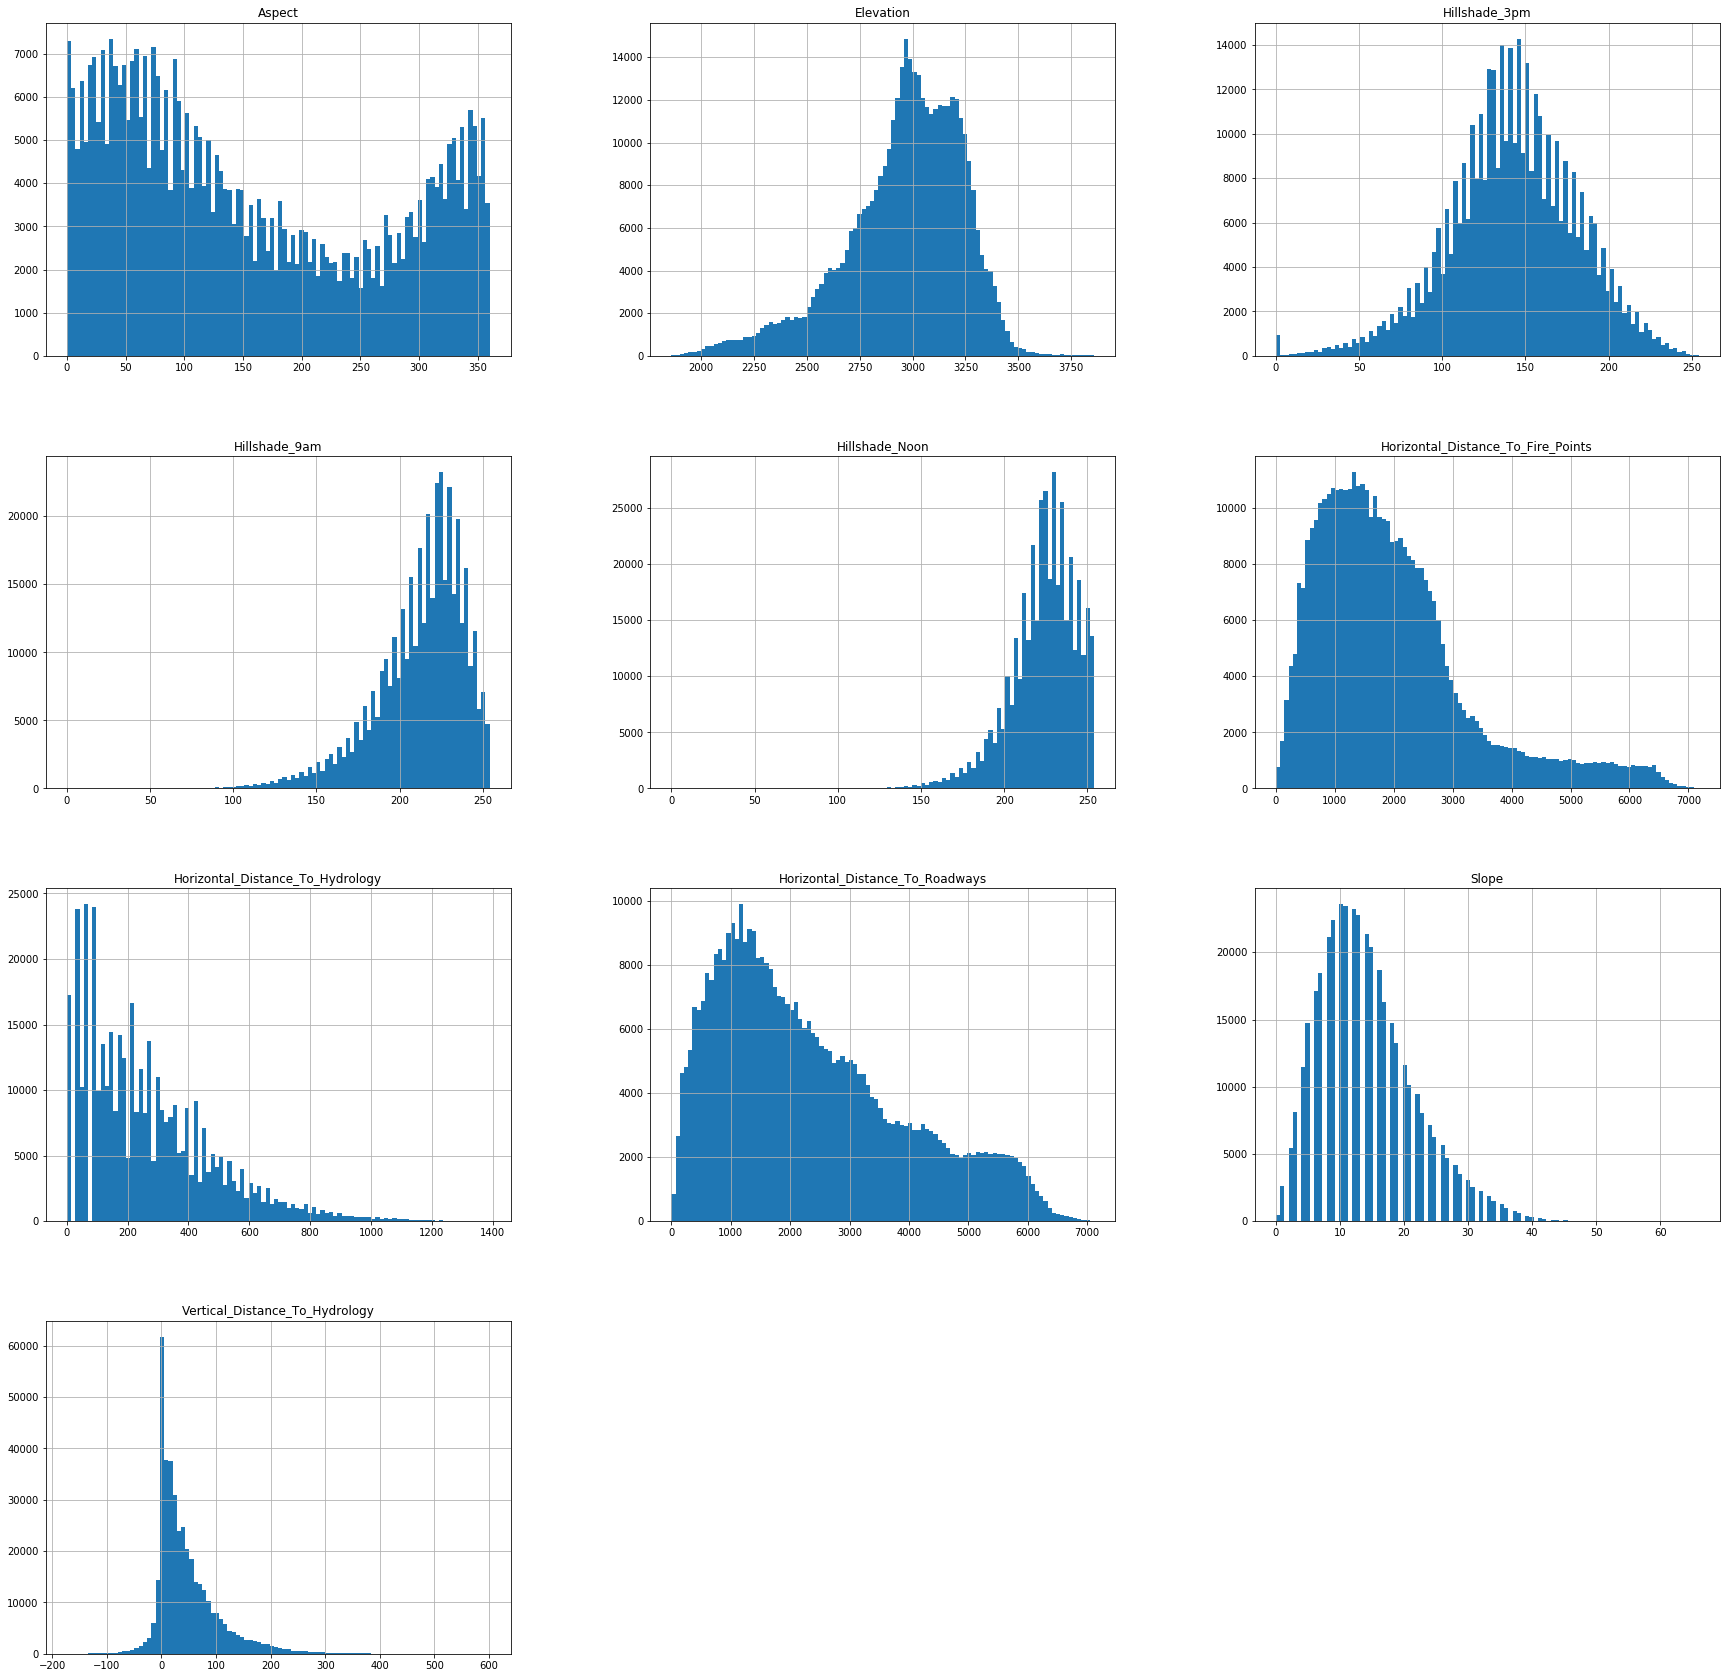

In [24]:
#Plotting garph for each of the above mentioned important features
plt.rcParams['figure.figsize'] = [30, 30]
X_train_graph.hist(bins=100)
plt.show()

In [25]:
# based on analysis, we can see that data from "Hillshade_3pm" is missing. 
# Reason: Data specifically from range 0-50 is '0' in case of Hillshade values at 9am which states the maximum light as per the UCI data information, whereas if we observe the graph for the same range in Hillshade graph at 3PM it is mostly dark i.e the index value is greater than 0.
# We can preprocess this column as well by filling missing data using a formula, i.e. by using the avarage of Hill_Shade_at_9am and Hill_Shade_at_Noon [(_9am and Noon)/2]

#### Preprocessing 2 and Feature Selection

Here we have used another classification approach i.e. the ExtraTreesClassifier. The benifit of using the ExtraTreesClassifier is that it gives us the information about the most relevant and most valuable features from the data set.

In [26]:
from sklearn.ensemble import ExtraTreesClassifier
import numpy.core.multiarray
X = df.iloc[:, 0:-1]
y = df.iloc[:,-1]

model = ExtraTreesClassifier()
model.fit(X, y)
#print(model.feature_importances_)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [27]:
model.classes_

array([1, 2, 3, 4, 5, 6, 7])

In [28]:
#fetching the list of the most important features
features_importance = model.feature_importances_

In [1]:
importance = numpy.argsort(features_importance)

NameError: name 'numpy' is not defined

In [30]:
#reversing this list
important_features_10 = importance[::-1][:10]

In [31]:
#Out from the list of most important features, we are selecting the 10 most important features from this list and appending the 'Cover Type' column to the end of the data set
important_features_list = []
for index in important_features_10:
    important_features_list.append(df.columns[index])
important_features_list.append("Cover_Type")

In [32]:
df_important = df.loc[:,important_features_list]
df_important.count()

Elevation                             581011
Horizontal_Distance_To_Roadways       581011
Horizontal_Distance_To_Fire_Points    581011
Horizontal_Distance_To_Hydrology      581011
Vertical_Distance_To_Hydrology        581011
Aspect                                581011
Hillshade_Noon                        581011
Hillshade_3pm                         581011
Hillshade_9am                         581011
Slope                                 581011
Cover_Type                            581011
dtype: int64

In [33]:
#Train and Test data is prepared based on the important feature selection made in the above step
X_train_imp, X_test_imp, y_train_imp, y_test_imp = create_balanced_train_test_set(df_important)

In [34]:
# Run KNN without pre-processing of data
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=7)
# fit the train data into 7 groups
model.fit(X_train_imp, y_train_imp) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

In [35]:
y_pred_imp = model.predict(X_test_imp)

In [36]:
accuracy_score(y_test_imp, y_pred_imp)

0.9633227005691206

In [37]:
# Extra Tree Classifier is used here instead of decision tree, because this classifier uses random decision trees 
# on datasets provided, importace of this algorithm over decision tree is that this uses "gini" for data split.

from sklearn.ensemble import ExtraTreesClassifier
import numpy.core.multiarray

model = ExtraTreesClassifier()
model.fit(X_train_imp, y_train_imp)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [38]:
y_pred_imp = model.predict(X_test_imp)

In [39]:
accuracy_score(y_test_imp, y_pred_imp)

0.9283321094180282

#### Accuracy

1. Preprocessing 1: Based on data analysis on Soil_Type Columns we can see that data is absent for most of the columns. We will drop Soil_Type Columns where absence count is greateer than 58000, as including data columns with data as absence does not adds any value to our classification.
    
        Classifiaction Techniques =========> Accuracy
        
                K Nearest Neighbours =========> 96.3%
        
                    Decision Tree  =========> 93.5%
                    
    Feature Selection: Based on data analysis on Soil_Type Columns we can see that data is absent for most of the   columns. We will drop Soil_Type Columns where absence count is greateer than 58000, as including data columns with data as absence does not adds any value to our classification.
    
    
    
2. Preprocessing 2: Here we have used another classification approach i.e. the ExtraTreeClassifier. The benifit of using the ExtraTreesClassifier is that it gives us the information about the most relevant and most valuable features from the data set.
    
        Classifiaction Techniques =========> Accuracy
        
                K Nearest Neighbours =========> 96.3%
        
                    Decision Tree  =========> 92.8%
                    
    Feature Selection: Feature are selected using Extra Tree Classifier important features. I have used top 10 most 
    features.
    
 
##### Insights and problems in dataset
On evaluating the performance and classification accuracy we observe that the classification of the dataset is dependent on several features which can add or reduce the accuracy of our results.
Feature selection a nd processing of these feature is much needed as the data set provided is really large and many of the columns have missing values that does not provided any insight to our classification.

Even though, we have used multiple pre-processing approches and different classification algorithms we get an insight that the accuracy does not varies much. Hence for such large data sets we need to be more careful in processing the features. Although the accuracy achieved through our classification techniques is around 90% which can be considered good, but we can further put our efforts in analysing the data set more closely and carefully so that the best classification level could be achieved  and the final data after all the processing and classification gives us a better clarity of the entire dataset.